In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import requests
from PIL import Image
from io import BytesIO

from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats


In [2]:
import time, tqdm
from adjustText import adjust_text

## Shots

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
shots_df = ShotChartDetail(team_id=0, player_id=0, season_nullable='2020-21', context_measure_simple='FGA')

ChunkedEncodingError: ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read))

In [ ]:
shots_df = shots_df.get_data_frames()[0]

In [ ]:
shots_df

In [ ]:
three_df = shots_df.loc[shots_df.SHOT_TYPE == '3PT Field Goal']
three_df = three_df.loc[three_df.SHOT_DISTANCE <= 47]  # only half court shots


In [ ]:
grouped_data = three_df.groupby('PLAYER_NAME').SHOT_DISTANCE.mean()

## Retrieving top shooters

In [ ]:
league_stats = LeagueDashPlayerStats()

league_df = league_stats.get_data_frames()[0]

In [ ]:
top_shooters = league_df.sort_values(by='FG3M', ascending=False).iloc[:60]

In [ ]:
distances = []
for i in range(len(top_shooters)):
    item = top_shooters.iloc[i]
    distances.append(grouped_data.loc[item.PLAYER_NAME])
top_shooters.loc[:, 'AVG_3PT_DIST'] = distances

In [ ]:
top_shooters.loc[:, 'AVG_3PT_DIST_M'] = top_shooters.AVG_3PT_DIST * 0.3048

In [ ]:
shooters = top_shooters.loc[top_shooters.PLAYER_NAME.isin(["Stephen Curry", "Damian Lillard", "Joe Harris", "Duncan Robinson", "Paul George", "Mikal Bridges"])]

In [ ]:
shooters

## Plotting

In [ ]:
import random
from matplotlib.patches import Circle, Rectangle, Arc

# Amazing function by Bradley Fay for plotting the nba court
# source: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
def draw_court(ax=None, color='black', lw=2, background_color="#EBEBE8", outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False, zorder=0)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False, zorder=0)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed', zorder=0)
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color, zorder=0)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 138, linewidth=lw,
                               color=color, zorder=0)
    corner_three_b = Rectangle((220, -47.5), 0, 138, linewidth=lw, color=color, zorder=0)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.13, theta2=157.87, linewidth=lw,
                    color=color, zorder=0)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color, zorder=0)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    # Draw the half court line, baseline and side out bound lines
    outer_lines = Rectangle((-249, -48), 498, 470, linewidth=lw,
                            color=color, fill=None)
    court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [ ]:
team_colors = {
    'IND': "#FDBB30",
    'HOU': "#CE1141",
    'SAC': "#5A2D81",
    'MIA': "#DB3EB1",
    'POR': "#CE1141",
    'CHA': "#00788C",
    'ATL': "#C1D32F",
    'WAS': "#002B5C",
    'UTA': "#F9A01B",
    'DAL': "#00538C",
    'CHI': "#CE1141",
    'MIN': "#78BE20",
    'LAL': "#552583",
    'DET': "#1D42BA",
    'BKN': "#000000",
    "TOR": "#B4975A",
    "NOP": "#0C2340",
    "GSW": "#FFC72C",
    "BKN": "black",
    "LAC": "#1D428A",
    "PHX": "#1D1160"
}

In [ ]:
import math
import random
from matplotlib.patches import Circle, Rectangle, Arc


In [ ]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
shooters = shooters.sort_values(by='AVG_3PT_DIST_M', ascending=False)

In [ ]:
top_shooters.sort_values(by='AVG_3PT_DIST_M', ascending=False)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 14))

handles = []
labels = []
for index in range(len(shooters)):
    item = shooters.iloc[index]
    radius = item.AVG_3PT_DIST * 10
    y = math.sqrt(pow(radius, 2) - pow(220, 2))
    angle = math.degrees(math.atan(y / 220.))
    three_arc = Arc((0, 0), radius * 2, radius * 2, theta1=angle, theta2=180 - angle,
                    linewidth=2, ls='--', color=team_colors[item.TEAM_ABBREVIATION])
    labels.append(f"{item.PLAYER_NAME}: {item.AVG_3PT_DIST_M:.2f}m/{item.AVG_3PT_DIST:.2f}ft")
    handles.append(plt.plot([],ls='--', color=team_colors[item.TEAM_ABBREVIATION])[0])
    ax.add_patch(three_arc)
    

labels.append(f"3PT Line: 7.24m/23.75ft")
handles.append(plt.plot([],ls='-', color=bball_orange)[0])
#three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
#                    color=color, zorder=0)
#ax = plt.gca()
#ax.add_patch(three_arc)
#arc_patch((0, 0), 26, 22, 158, ax=ax, fill=False, color='#FFFFFF', zorder=10)

#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
ax.set_frame_on(False)


# Removing ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#ax.legend()
legend = ax.legend(handles, labels, fontsize=12)
frame = legend.get_frame()
frame.set_facecolor("#f0f0f0")
frame.set_linewidth(2)
#frame.set_edgecolor(bball_light_orange)
#for text in legend.get_texts():
#    text.set_color(bball_light_orange)
ax.grid(False)

# Title
ax.set_title("Avg distances of 3PT Shots for some interesting players", size=28, color='black')

# Drawing court
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
ax.set_xlim(-251,251)
ax.set_ylim(-65,423)
ax.text(x=-250, y=-60, va='center', ha='left', s='source: nba.com')
ax.text(x=250, y=-60, va='center', ha='right', s='instagram: @bballytics')




### 2016-17 Rockets

In [49]:
from nba_api.stats.static.teams import find_teams_by_full_name

In [50]:
team_id = find_teams_by_full_name("Houston Rockets")[0]['id']

In [51]:
shots_df = ShotChartDetail(team_id=team_id, player_id=0, season_nullable='2016-17', context_measure_simple='FGA', season_type_all_star="Regular Season")

shots_df = shots_df.get_data_frames()[0]

In [52]:
shots_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600013,2,201583,Ryan Anderson,1610612745,Houston Rockets,1,11,44,...,Center(C),24+ ft.,25,57,251,1,1,20161026,LAL,HOU
1,Shot Chart Detail,0021600013,7,2772,Trevor Ariza,1610612745,Houston Rockets,1,11,11,...,Center(C),Less Than 8 ft.,7,-46,55,1,0,20161026,LAL,HOU
2,Shot Chart Detail,0021600013,9,201935,James Harden,1610612745,Houston Rockets,1,10,58,...,Center(C),Less Than 8 ft.,2,-24,8,1,1,20161026,LAL,HOU
3,Shot Chart Detail,0021600013,11,201569,Eric Gordon,1610612745,Houston Rockets,1,10,27,...,Center(C),8-16 ft.,12,-36,124,1,1,20161026,LAL,HOU
4,Shot Chart Detail,0021600013,13,201935,James Harden,1610612745,Houston Rockets,1,10,15,...,Center(C),Less Than 8 ft.,2,-13,16,1,1,20161026,LAL,HOU
5,Shot Chart Detail,0021600013,18,201583,Ryan Anderson,1610612745,Houston Rockets,1,9,43,...,Center(C),8-16 ft.,15,-18,153,1,1,20161026,LAL,HOU
6,Shot Chart Detail,0021600013,22,201935,James Harden,1610612745,Houston Rockets,1,9,14,...,Left Side Center(LC),24+ ft.,25,-142,217,1,1,20161026,LAL,HOU
7,Shot Chart Detail,0021600013,37,2403,Nene,1610612745,Houston Rockets,1,8,7,...,Center(C),Less Than 8 ft.,3,-10,31,1,0,20161026,LAL,HOU
8,Shot Chart Detail,0021600013,42,2403,Nene,1610612745,Houston Rockets,1,7,30,...,Left Side(L),8-16 ft.,12,-109,52,1,0,20161026,LAL,HOU
9,Shot Chart Detail,0021600013,47,2403,Nene,1610612745,Houston Rockets,1,7,8,...,Center(C),Less Than 8 ft.,0,0,1,1,1,20161026,LAL,HOU


In [53]:
three_df = shots_df.loc[shots_df.SHOT_TYPE == '3PT Field Goal']
three_df = three_df.loc[three_df.SHOT_DISTANCE <= 47]  # only half court shots


grouped_data = three_df.groupby('PLAYER_NAME').SHOT_DISTANCE.mean()

In [59]:
grouped_data = grouped_data.to_frame().reset_index()

In [60]:
target_players = ["James Harden", "Eric Gordon", "Ryan Anderson", "Trevor Ariza", "Patrick Beverley", "Lou Williams"]

In [62]:

target_data = grouped_data.loc[grouped_data.PLAYER_NAME.isin(target_players)]

In [65]:
target_data.loc[:, 'SHOT_DISTANCE_M'] = target_data.SHOT_DISTANCE * 0.3048

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
target_data

,PLAYER_NAME,SHOT_DISTANCE,SHOT_DISTANCE_M
2,Eric Gordon,25.199088,7.680682
4,James Harden,25.213049,7.684937
7,Lou Williams,25.062016,7.638902
10,Patrick Beverley,24.396491,7.436051
11,Ryan Anderson,25.539526,7.784447
13,Trevor Ariza,24.393502,7.435139


In [76]:
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

(-65, 423)

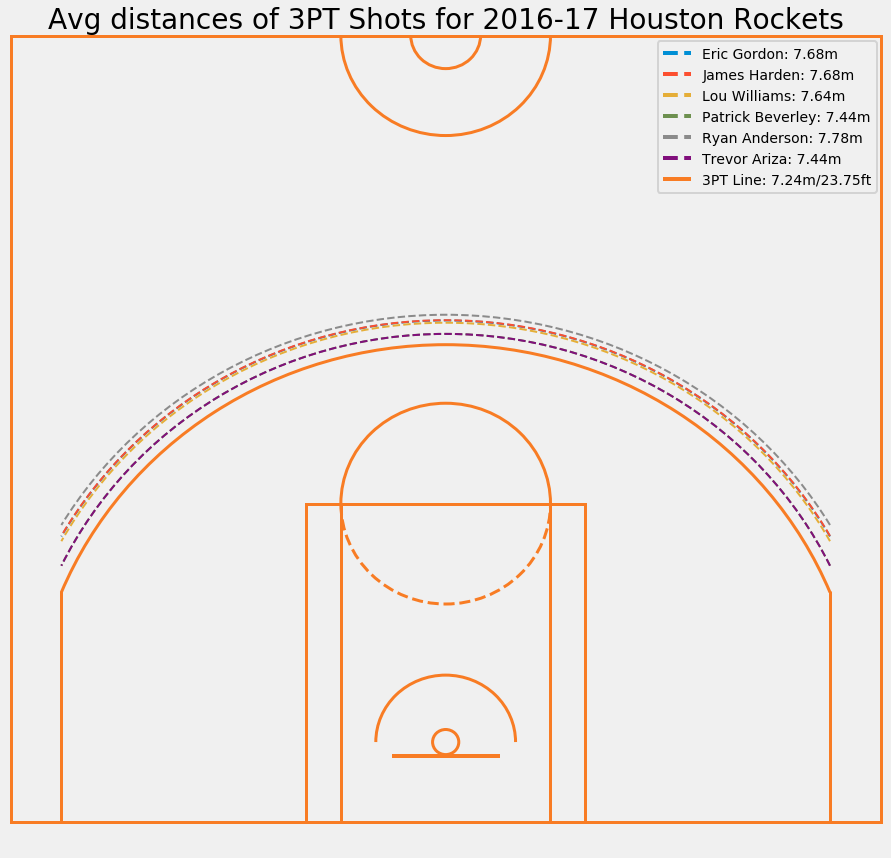

In [78]:
fig, ax = plt.subplots(figsize=(14, 14))

handles = []
labels = []
for index in range(len(target_data)):
    item = target_data.iloc[index]
    radius = item.SHOT_DISTANCE * 10
    y = math.sqrt(pow(radius, 2) - pow(220, 2))
    angle = math.degrees(math.atan(y / 220.))
    three_arc = Arc((0, 0), radius * 2, radius * 2, theta1=angle, theta2=180 - angle,
                    linewidth=2, ls='--', label=f'{item.PLAYER_NAME}: {item.SHOT_DISTANCE_M:.2f}m', color=colors[index])
    labels.append(f"{item.PLAYER_NAME}: {item.SHOT_DISTANCE_M:.2f}m")
    handles.append(plt.plot([],ls='--', color=colors[index])[0])
    ax.add_patch(three_arc)
    

labels.append(f"3PT Line: 7.24m/23.75ft")
handles.append(plt.plot([],ls='-', color=bball_orange)[0])
    
#three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
#                    color=color, zorder=0)
#ax = plt.gca()
#ax.add_patch(three_arc)
#arc_patch((0, 0), 26, 22, 158, ax=ax, fill=False, color='#FFFFFF', zorder=10)

#ax.set_facecolor(bball_gray)
#fig.set_facecolor(bball_gray)
ax.set_frame_on(False)


# Removing ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
#ax.legend()
legend = ax.legend(handles=handles, labels=labels)
frame = legend.get_frame()
frame.set_facecolor("#f0f0f0")
frame.set_linewidth(2)
#frame.set_edgecolor(bball_light_orange)
#for text in legend.get_texts():
#    text.set_color(bball_light_orange)
ax.grid(False)

# Title
ax.set_title("Avg distances of 3PT Shots for 2016-17 Houston Rockets", size=28, color='black')

# Drawing court
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
ax.set_xlim(-251,251)
ax.set_ylim(-65,423)
#ax.text(x=-250, y=-60, va='center', ha='left', s='source: nba.com')
#ax.text(x=250, y=-60, va='center', ha='right', s='instagram: @bballytics')




## COrrect calculation

In [23]:
three_df = shots_df.loc[shots_df.SHOT_TYPE == '3PT Field Goal']
three_df = three_df.loc[three_df.SHOT_DISTANCE <= 42]  # only half court shots
three_df.loc[:, 'CALC_DISTANCE'] = ((three_df.LOC_X ** 2) + (three_df.LOC_Y ** 2)) ** (1/2) / 10

In [25]:
longer_three = three_df.loc[three_df.CALC_DISTANCE >= 24.75]

In [31]:
three_df.SHOT_MADE_FLAG.sum() / three_df.SHOT_ATTEMPTED_FLAG.sum()

0.3697808285814664

In [32]:
longer_three.SHOT_MADE_FLAG.sum() / longer_three.SHOT_ATTEMPTED_FLAG.sum()

0.36011327488556133

In [30]:
9283 / 25778

0.36011327488556133